In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [2]:
data = pd.read_csv("3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69 (3).csv")


In [3]:
#DATA UNDERSTANDING

In [4]:
data.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",22-02-2024 10:00:00,16.515083,80.518167,SO2,12.0,32.0,17.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",22-02-2024 10:00:00,16.515083,80.518167,CO,16.0,49.0,41.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",22-02-2024 10:00:00,14.675886,77.593027,SO2,4.0,26.0,9.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",22-02-2024 10:00:00,13.204880,79.097889,NH3,1.0,4.0,2.0
4,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",22-02-2024 10:00:00,14.465052,78.824187,CO,15.0,34.0,24.0


In [5]:
data.shape

(3305, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3305 non-null   object 
 1   state          3305 non-null   object 
 2   city           3305 non-null   object 
 3   station        3305 non-null   object 
 4   last_update    3305 non-null   object 
 5   latitude       3305 non-null   float64
 6   longitude      3305 non-null   float64
 7   pollutant_id   3305 non-null   object 
 8   pollutant_min  3058 non-null   float64
 9   pollutant_max  3058 non-null   float64
 10  pollutant_avg  3058 non-null   float64
dtypes: float64(5), object(6)
memory usage: 284.2+ KB


In [7]:
#Column names
data.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

In [8]:
data.pollutant_id.unique()

array(['SO2', 'CO', 'NH3', 'PM10', 'PM2.5', 'OZONE', 'NO2'], dtype=object)

In [9]:
#Checking for duplicates
duplicate = data.duplicated().sum()
duplicate

0

In [10]:
#missing values present in the dataset
data.isnull().sum() 

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    247
pollutant_max    247
pollutant_avg    247
dtype: int64

There are 247 null values in the column "pollutant_min", "pollutant_max", "pollutant_avg". Later in data preprocessing imputed them with the mean values.

In [11]:
data.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3305.000000,3305.000000,3058.000000,3058.000000,3058.000000
mean,22.753594,78.602106,23.804120,78.440811,42.360693
std,5.451943,4.851479,26.727607,84.951490,44.516584
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.065931,75.578914,5.000000,19.000000,10.000000
50%,23.331731,77.315741,14.000000,52.000000,26.000000
75%,27.198620,80.518167,33.000000,104.750000,59.750000
max,34.066206,94.636574,163.000000,500.000000,323.000000


In [12]:
data.nunique()

country            1
state             31
city             265
station          496
last_update        1
latitude         496
longitude        496
pollutant_id       7
pollutant_min    140
pollutant_max    339
pollutant_avg    209
dtype: int64

In [13]:
data.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max',
       'pollutant_avg'],
      dtype='object')

#DATA PREPROCESSING


In [14]:
#Imputing the Null columns with mean
data['pollutant_min'] = data['pollutant_min'].fillna(data['pollutant_min'].mean())

In [15]:
data['pollutant_max'] = data['pollutant_max'].fillna(data['pollutant_max'].mean())

In [16]:
data['pollutant_avg'] = data['pollutant_avg'].fillna(data['pollutant_avg'].mean())

In [17]:
data.isnull().sum() #after preprocessing

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [18]:
data.pollutant_id.unique()

array(['SO2', 'CO', 'NH3', 'PM10', 'PM2.5', 'OZONE', 'NO2'], dtype=object)

In [19]:
data.pollutant_min.unique()

array([ 12.        ,  16.        ,   4.        ,   1.        ,
        15.        ,  50.        ,  47.        ,   3.        ,
        25.        ,   2.        ,  14.        ,  17.        ,
       106.        ,  34.        ,   5.        , 120.        ,
         9.        , 133.        ,  72.        ,  23.80412034,
        21.        ,  11.        ,  27.        ,   8.        ,
        20.        ,  28.        ,  26.        ,  30.        ,
        54.        ,  13.        ,   7.        ,   6.        ,
        10.        ,  31.        ,  43.        ,  57.        ,
       116.        ,  18.        ,  24.        ,  48.        ,
       124.        ,  44.        , 108.        ,  51.        ,
        68.        ,  94.        ,  69.        ,  67.        ,
        40.        ,  22.        ,  58.        , 104.        ,
        49.        ,  65.        ,  60.        ,  66.        ,
        41.        ,  33.        ,  39.        ,  79.        ,
        23.        ,  38.        ,  46.        ,  63.  

In [20]:
data.pollutant_max.unique()

array([ 32.        ,  49.        ,  26.        ,   4.        ,
        34.        , 111.        ,  67.        ,   5.        ,
        27.        ,  25.        ,  89.        , 500.        ,
        75.        ,  83.        ,  42.        , 145.        ,
       306.        ,   3.        ,  16.        , 407.        ,
        24.        ,  64.        , 116.        ,   1.        ,
        78.44081099,  38.        ,  17.        ,  53.        ,
         2.        ,   9.        ,  43.        ,  10.        ,
        48.        , 308.        , 437.        , 398.        ,
        36.        ,  14.        ,  55.        ,  82.        ,
        91.        ,  19.        ,  44.        ,  45.        ,
         8.        , 430.        , 160.        , 255.        ,
       322.        , 153.        , 270.        ,  35.        ,
        31.        ,  13.        ,  23.        , 310.        ,
         6.        ,  72.        ,  60.        , 365.        ,
       450.        ,  40.        , 246.        ,  12.  

In [21]:
data.pollutant_avg.unique()

array([ 17.        ,  41.        ,   9.        ,   2.        ,
        24.        ,  73.        ,  60.        ,   4.        ,
         8.        ,  25.        ,  12.        , 138.        ,
        21.        ,  54.        ,  20.        , 275.        ,
         5.        ,  23.        , 183.        ,   3.        ,
        11.        , 281.        ,  19.        ,  15.        ,
        77.        ,   1.        ,  42.36069326,  31.        ,
        38.        ,  33.        ,  94.        , 106.        ,
       127.        ,  14.        ,  46.        ,  10.        ,
        53.        ,  71.        ,  16.        ,  13.        ,
        81.        ,   7.        , 128.        , 114.        ,
       165.        ,  18.        ,  86.        ,  59.        ,
        51.        ,  32.        ,  28.        ,  89.        ,
       144.        ,   6.        , 161.        ,  76.        ,
       149.        ,  22.        , 141.        ,  36.        ,
        26.        , 134.        ,  87.        ,  42.  

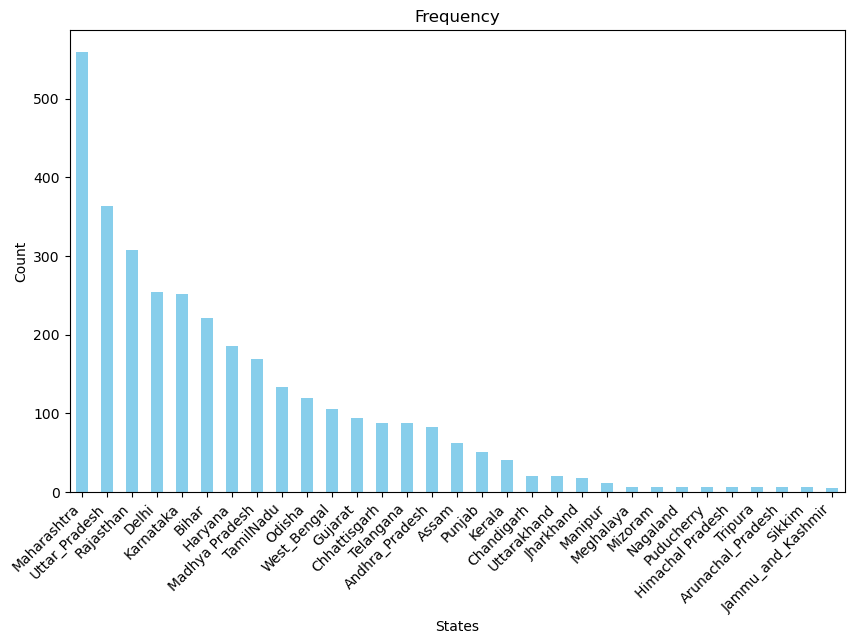

In [22]:
state_counts = data['state'].value_counts()
plt.figure(figsize=(10, 6))  
state_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

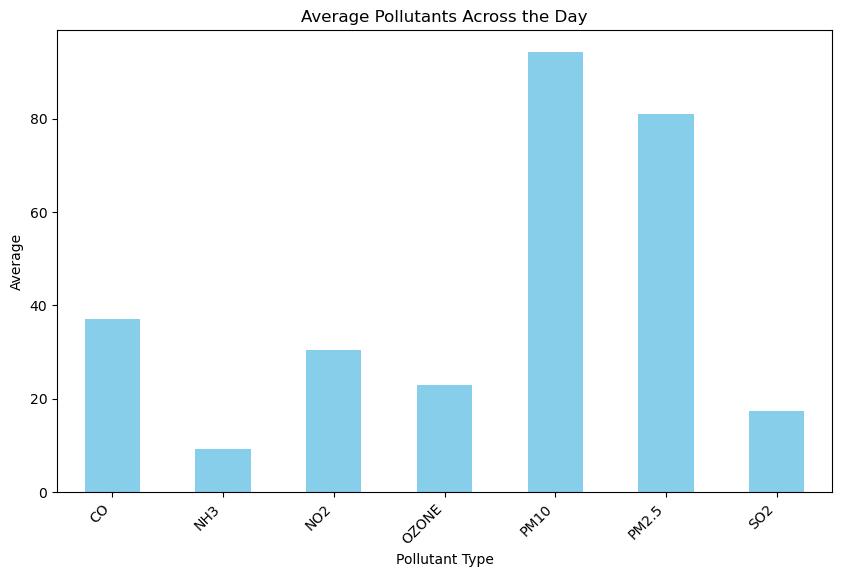

In [23]:
average_pollutants = data.groupby('pollutant_id')['pollutant_avg'].mean()
plt.figure(figsize=(10, 6))
average_pollutants.plot(kind='bar', color='skyblue')
plt.title('Average Pollutants Across the Day')
plt.xlabel('Pollutant Type')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right') 
plt.show()

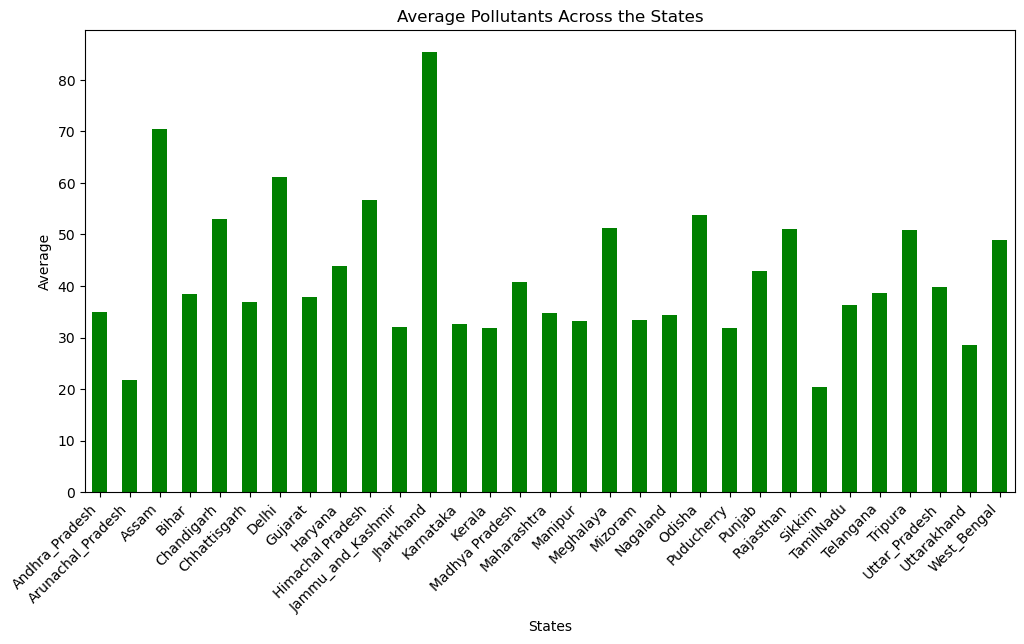

In [24]:
average_pollutants_state = data.groupby('state')['pollutant_avg'].mean()
plt.figure(figsize=(12, 6))
average_pollutants_state.plot(kind='bar', color='green')
plt.title('Average Pollutants Across the States')
plt.xlabel('States')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')  
plt.show()

C:\Users\djeev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


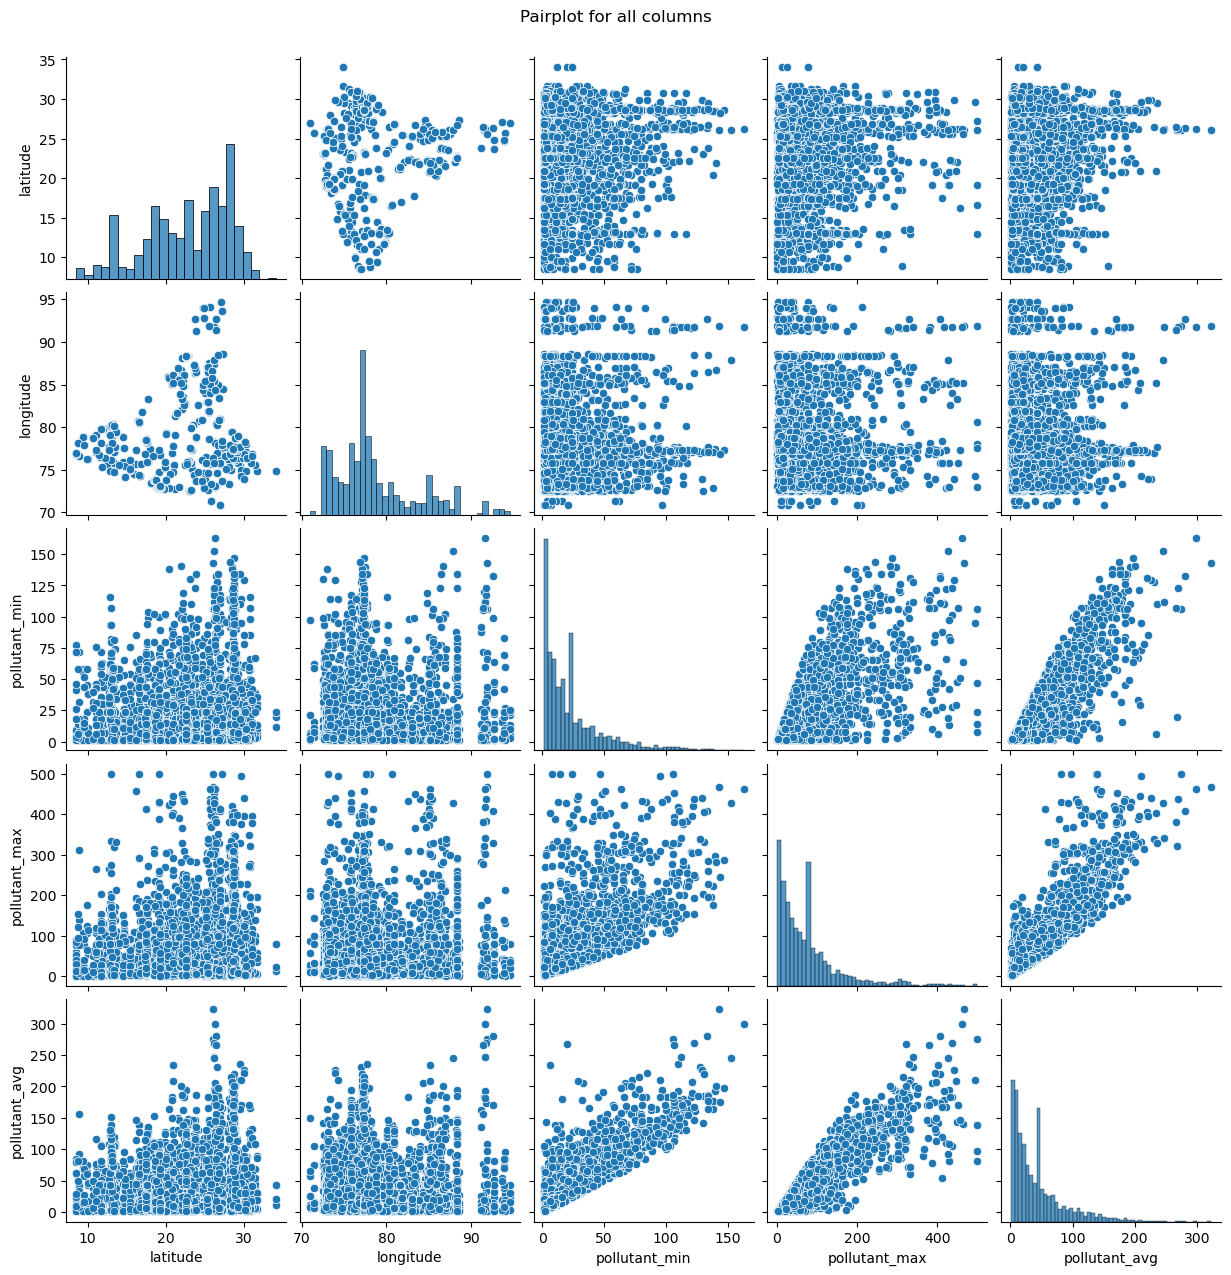

In [25]:
numeric_features = ['city',
       'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min',
       'pollutant_max', 'pollutant_avg']
sns.pairplot(data[numeric_features])
plt.suptitle('Pairplot for all columns', y=1.02)
plt.show()

In [26]:
data['state'].nunique()

31

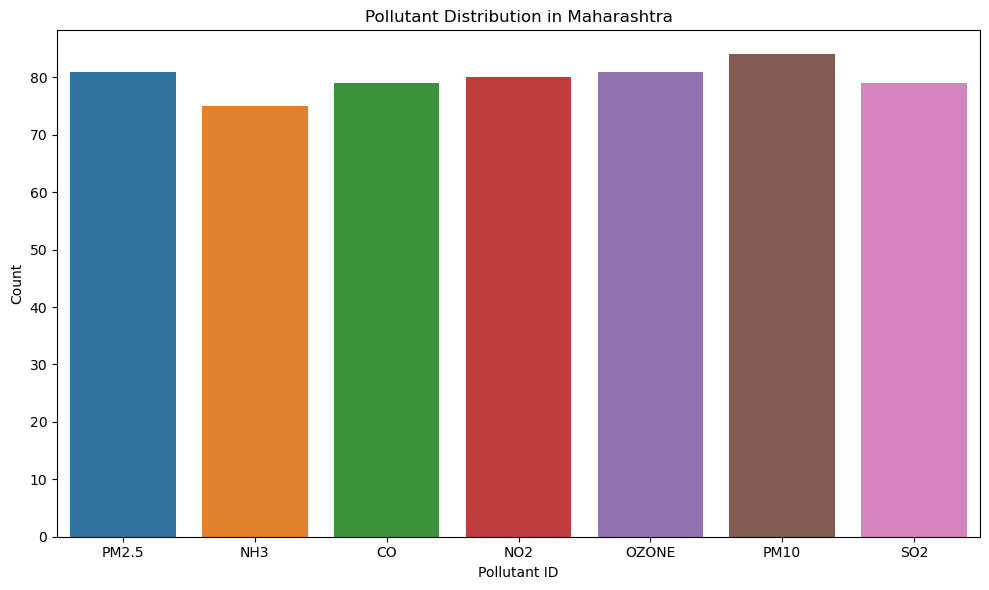

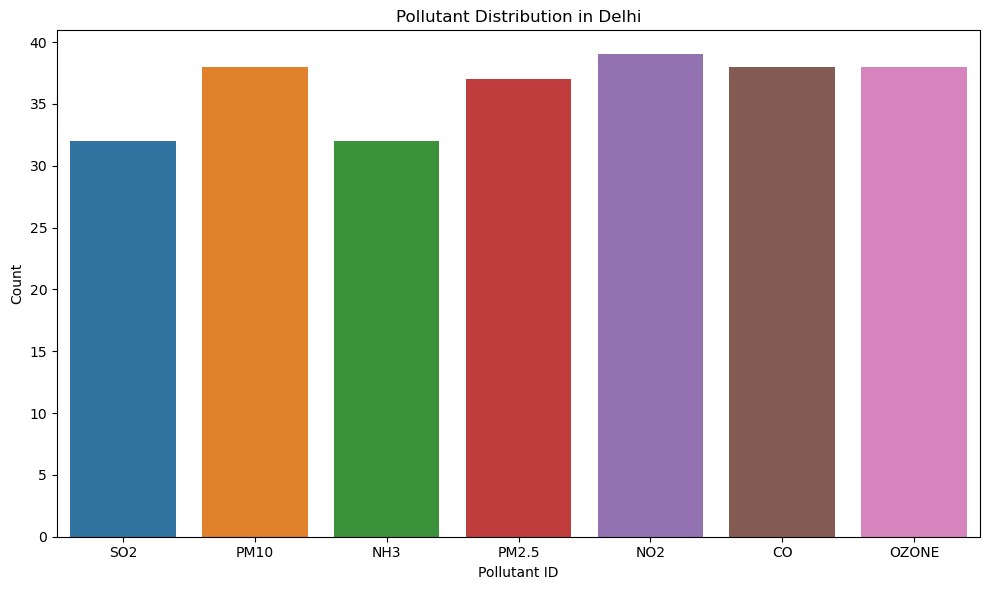

In [29]:
# Filter data for Maharashtra
maharashtra_data = data[data['state'] == 'Maharashtra']

# Plot bar chart for Maharashtra
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='pollutant_id', data=maharashtra_data)
plot.set_title('Pollutant Distribution in Maharashtra')
plt.xlabel('Pollutant ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Filter data for Delhi
delhi_data = data[data['state'] == 'Delhi']

# Plot bar chart for Delhi
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='pollutant_id', data=delhi_data)
plot.set_title('Pollutant Distribution in Delhi')
plt.xlabel('Pollutant ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [30]:
by_state = data.groupby('state')
by_state = data.groupby('state')
# Assuming 'data' is your DataFrame with columns 

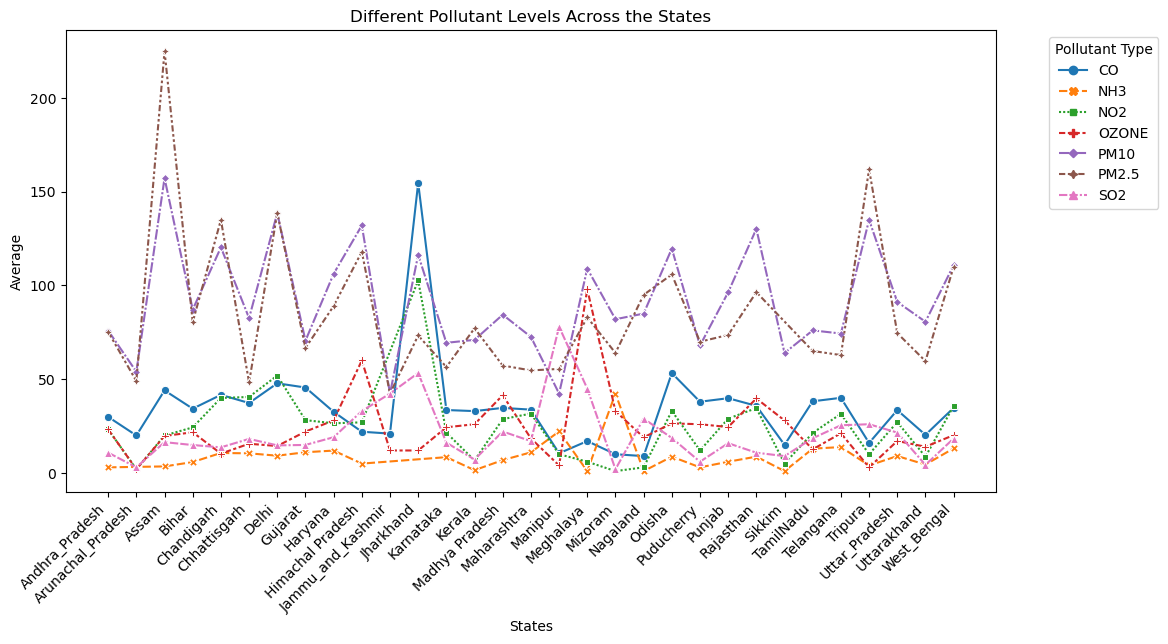

In [31]:
# Assuming 'data' is your DataFrame with columns 'state', 'pollutant_avg', and 'pollutant_type'
# Group by 'state' and 'pollutant_type', calculate the average
average_pollutants_state_type = data.groupby(['state', 'pollutant_id'])['pollutant_avg'].mean().unstack()

# Create a multiple line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_pollutants_state_type, markers=True, palette='tab10')
plt.title('Different Pollutant Levels Across the States')
plt.xlabel('States')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Pollutant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

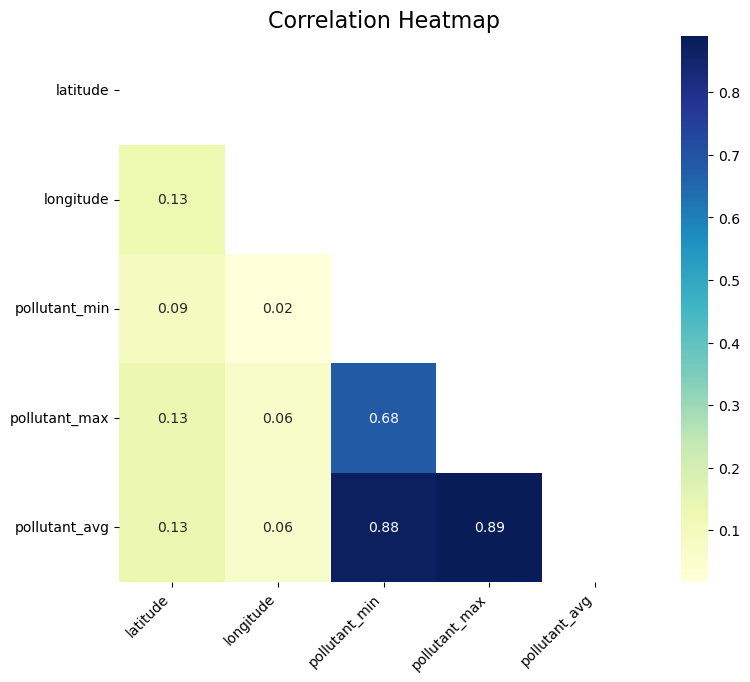

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numeric columns only
corr = data[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate the correlation heatmap
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="YlGnBu")

# Adjust the layout
plt.tight_layout()

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [33]:
features_col = ['city','latitude', 'longitude', 'pollutant_id', 'pollutant_min',
       'pollutant_max', 'pollutant_avg']

In [34]:
#Random Forest
X = data.drop([ 'country', 'state', 'pollutant_avg', 'station','last_update'], axis=1)
y = data['pollutant_avg']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

scale = ['latitude', 'longitude', 'pollutant_min',
       'pollutant_max']
ohe = ['city', 'pollutant_id']

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('sacle', MinMaxScaler(), scale),
        ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ohe)
    ], remainder='passthrough')

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)


In [39]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sacle', MinMaxScaler(),
                                                  ['latitude', 'longitude',
                                                   'pollutant_min',
                                                   'pollutant_max']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['city', 'pollutant_id'])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [41]:
data.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [43]:
print(f'Mean Squared Error: {mse:.2f}')
print(y_pred)
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 140.31
[  8.38        17.9          8.42        22.08        69.54
  42.1        101.72        25.16        16.2          3.12
  40.08        18.12        42.46         5.96       158.12
  36.66        72.06        28.58        51.52        71.8
 109.7         12.12        37.02        22.56       185.56
  22.32        78.02        42.36069326  13.42        28.5
 170.08        25.34         9.14        24.28        10.88
  65.8         12.38        15.5         17.2         42.36069326
  42.36069326  23.94        28.34        92.42        65.36
  24.44         5.46        12.08       132.2         27.06
  20.06       143.26        16.06        32.06        26.64
  47.46        38.4         43.12        55.32        10.16
  47.98        60.14        13.2          2.52        93.24
   3.04         3.02        57.16        63.02        21.34
  53.96        42.02        20.12        51.7         84.84
  60.66        24.42         7.44       136.08       176.62
  21.94  

In [44]:
#SVM

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define features and target
features_col = ['city', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min',
                'pollutant_max']
target_col = 'pollutant_avg'

# Split data (assuming your data is loaded into a DataFrame named 'data')
X = data.drop(columns=['country', 'state', 'station', 'last_update','pollutant_avg'], axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline (same as before)
scale = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max']
ohe = ['city', 'pollutant_id']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), scale),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ohe)
    ],
    remainder='passthrough'
)

# SVR model with adjusted parameters
model = SVR(kernel='rbf', C=75, epsilon=0.1)

# Pipeline with SVR model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 6.425297343612734
Mean Squared Error: 124.61584977454521
R-squared: 0.932783578438481


In [45]:
#catBoost
import pandas as pd  # Assuming your data is in a pandas DataFrame
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Define features and target
features_col = ['city', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min',
                'pollutant_max']
target_col = 'pollutant_avg'

# Split data (assuming your data is loaded into a DataFrame named 'data')
X = data.drop(columns=['country', 'state', 'station', 'last_update','pollutant_avg'], axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline (same as before)
scale = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max']
ohe = ['city', 'pollutant_id']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), scale),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ohe)
    ],
    remainder='passthrough'
)


# CatBoostRegressor model
model = CatBoostRegressor(learning_rate=0.2, iterations=20, loss_function='RMSE')

# Pipeline with CatBoost model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


0:	learn: 35.5986619	total: 246ms	remaining: 4.67s
1:	learn: 30.2959538	total: 250ms	remaining: 2.25s
2:	learn: 26.0930947	total: 255ms	remaining: 1.45s
3:	learn: 22.5693800	total: 260ms	remaining: 1.04s
4:	learn: 19.8122661	total: 265ms	remaining: 796ms
5:	learn: 17.5227628	total: 269ms	remaining: 628ms
6:	learn: 15.6426117	total: 273ms	remaining: 507ms
7:	learn: 14.2955802	total: 276ms	remaining: 415ms
8:	learn: 13.1642253	total: 280ms	remaining: 342ms
9:	learn: 12.3323127	total: 285ms	remaining: 285ms
10:	learn: 11.6359675	total: 293ms	remaining: 240ms
11:	learn: 11.1451739	total: 300ms	remaining: 200ms
12:	learn: 10.6884474	total: 304ms	remaining: 164ms
13:	learn: 10.2994353	total: 308ms	remaining: 132ms
14:	learn: 9.9898666	total: 312ms	remaining: 104ms
15:	learn: 9.7202288	total: 316ms	remaining: 79ms
16:	learn: 9.5465471	total: 320ms	remaining: 56.4ms
17:	learn: 9.4176475	total: 324ms	remaining: 36ms
18:	learn: 9.3179254	total: 327ms	remaining: 17.2ms
19:	learn: 9.2201132	total:

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define features and target
features_col = ['city', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min',
                'pollutant_max']
target_col = 'pollutant_avg'

# Split data (assuming your data is loaded into a DataFrame named 'data')
X = data.drop(columns=['country', 'state', 'station', 'last_update','pollutant_avg'], axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline (same as before)
scale = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max']
ohe = ['city', 'pollutant_id']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), scale),
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'), ohe)
    ],
    remainder='passthrough'
)

# Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=2)  # You can adjust max_depth here

# Pipeline with Decision Tree Regressor model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set (metric for decision tree regression can be R-squared or MSE)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: 0.75789009184416
Mean Squared Error: 448.8595382314973
Mean Absolute Error: 6.328767422496702


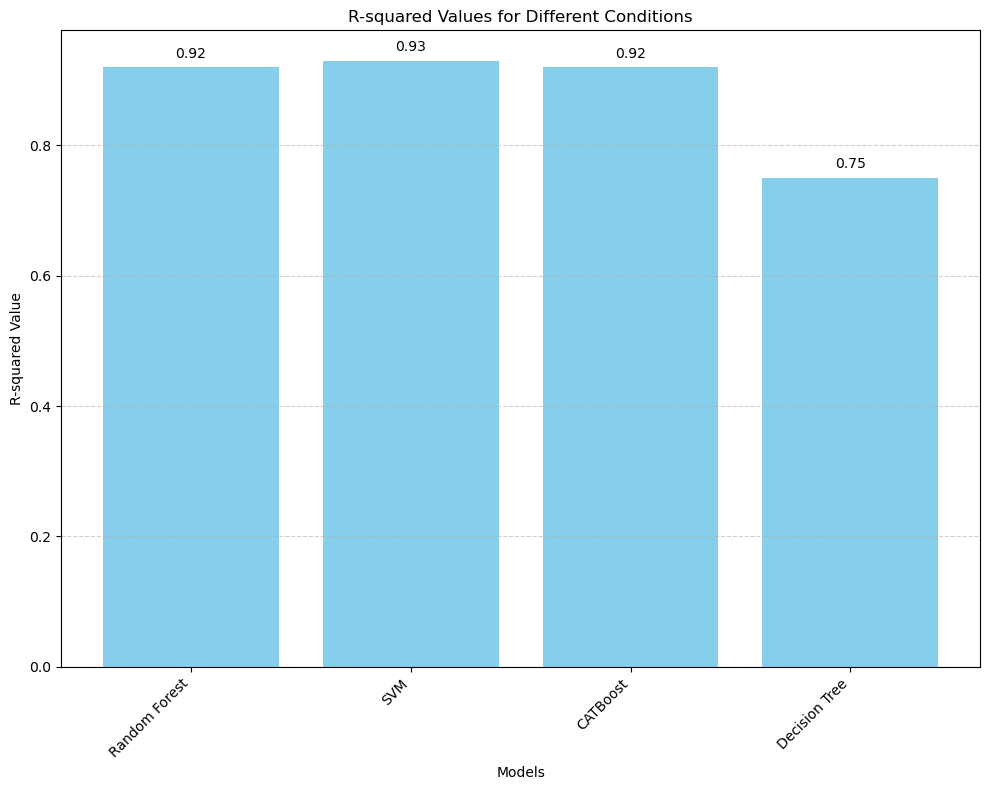

In [47]:
#plotting
import matplotlib.pyplot as plt

# Sample R-squared values for different conditions (replace with your data)
conditions = ["Random Forest", "SVM", "CATBoost", "Decision Tree"]
r_squared_values = [0.92, 0.93, 0.92, 0.75]

# Create the bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.bar(conditions, r_squared_values, color='skyblue')
plt.xlabel("Models")  # Fix the xlabel
plt.ylabel("R-squared Value")  # Fix the ylabel
plt.title("R-squared Values for Different Conditions")

# Display the R-squared values on top of the bars (optional)
for i, v in enumerate(r_squared_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')  # Adjust offset for clarity

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines on y-axis
plt.tight_layout()
plt.show()

In [ ]:
#pip install flask

In [ ]:
#import pickle

# Assuming you have your trained model stored in a variable called 'model'

# Save the model to a file
#with open('savemodel.sav', 'wb') as file:
   # pickle.dump(model, file)

#print("Model saved successfully!")

In [48]:
import pickle

# Save the model to a .pkl file
filename = 'savemodel.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [49]:
# Optionally, you can print some sample data to verify
print(X_test.head())

            city   latitude  longitude pollutant_id  pollutant_min  \
52    Kishanganj  26.088130  87.938403          SO2            3.0   
679        Patna  25.599486  85.113666          SO2           13.0   
969       Mumbai  19.108610  72.836220          NH3            7.0   
1251     Asansol  23.685297  86.945968           CO            8.0   
203    Bengaluru  12.781628  77.629914           CO           40.0   

      pollutant_max  
52             16.0  
679            24.0  
969            11.0  
1251           51.0  
203           125.0  


In [50]:
# Load the model from the .pkl file
model = pickle.load(open(filename, 'rb'))